# Set Up


In [2]:
#import and use python version 3.5
import sys
assert sys.version_info >= (3,5)


In [4]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [5]:
import numpy as np
import os
import tarfile
import urllib
import pandas as pd 
import urllib.request

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Loading Data


In [19]:
BlackFridaySale = pd.read_csv("/Users/gedoz/Downloads/BlackFridaySale.csv")
BlackFridaySale.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Data Structure


In [20]:
BlackFridaySale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


*There are 11 attributes, 7 of which are numerical whilst 5 of which are not. product_Category_2 and product_Category_3 both do not total to 550068 which might be an indicator of missing values or NAN values*

In [21]:
BlackFridaySale["Product_ID"].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [22]:
BlackFridaySale["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

*Product IDs are unique so might be good primary keys*

In [24]:
BlackFridaySale.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


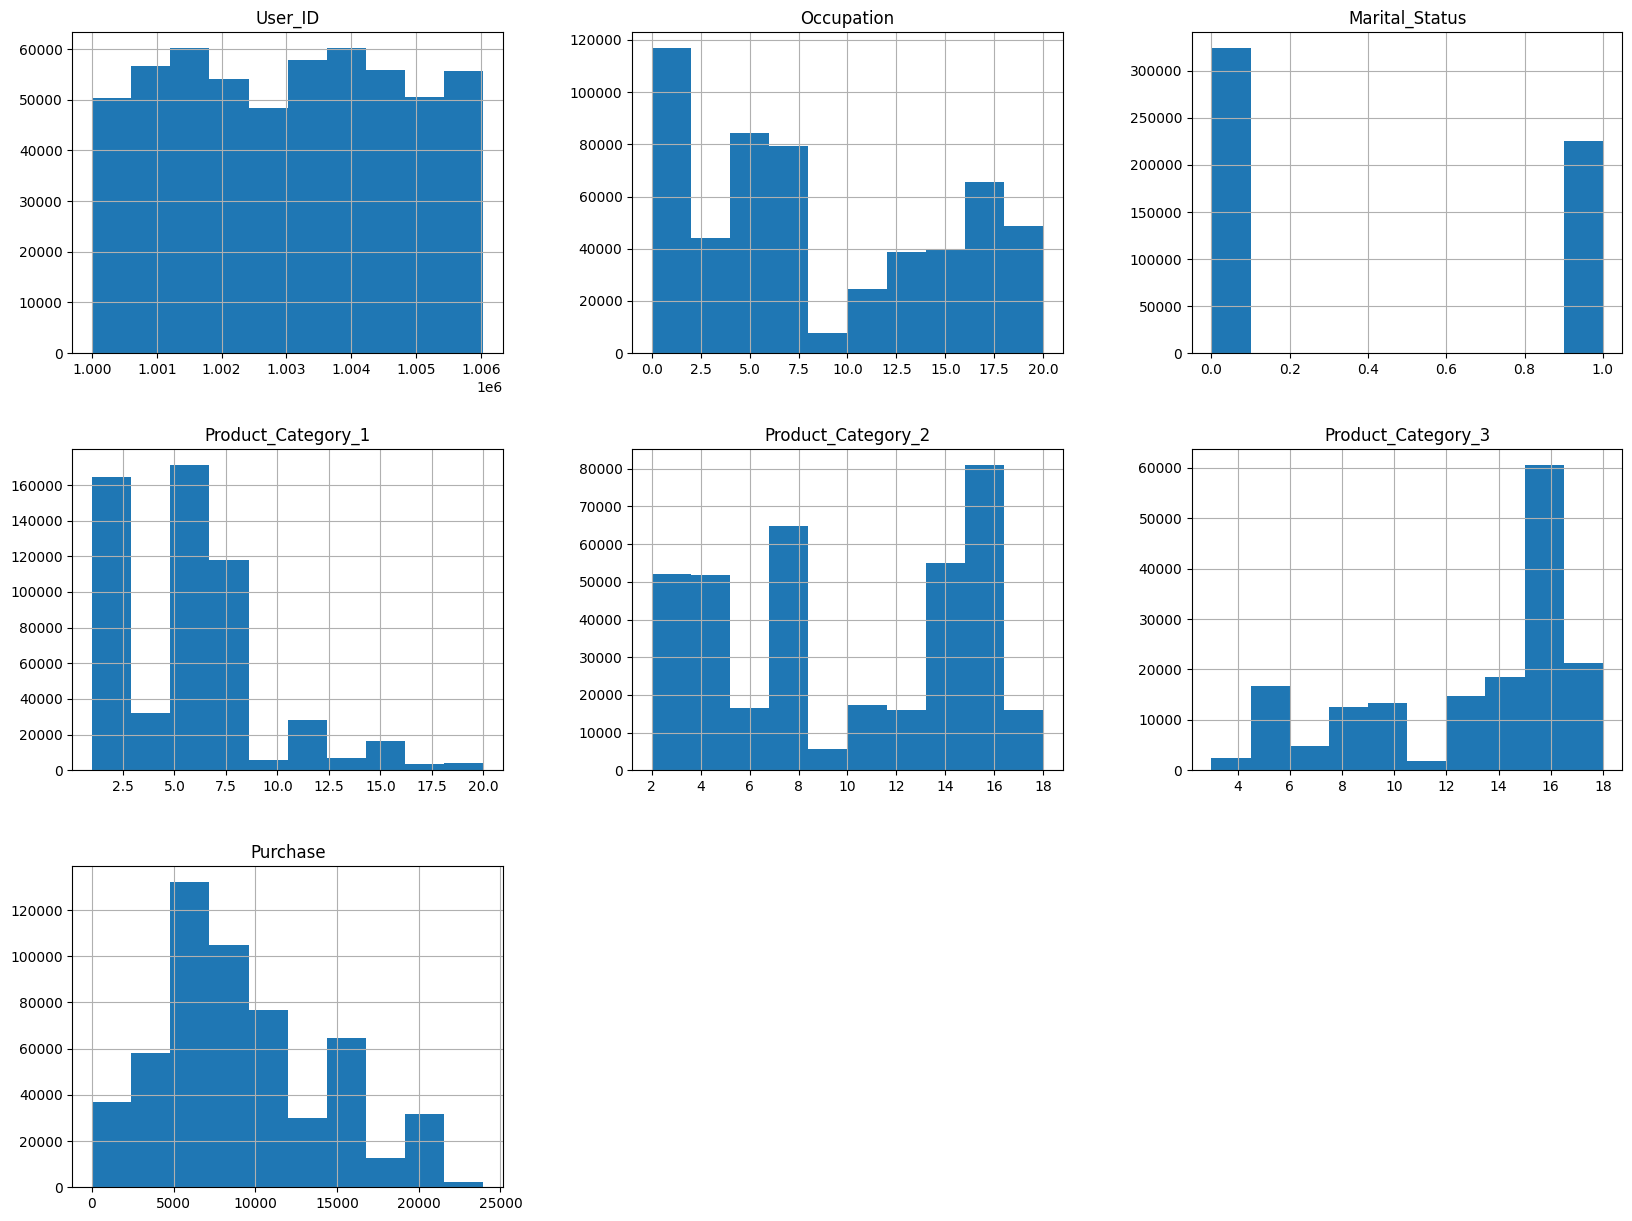

In [32]:

BlackFridaySale.hist(bins=10, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram

# Correlations

In [34]:
corr_matrix = BlackFridaySale.corr()

In [37]:
corr_matrix["Occupation"].sort_values(ascending=False)

Occupation            1.000000
Marital_Status        0.024280
Purchase              0.020833
Product_Category_3    0.013263
Product_Category_2   -0.000384
Product_Category_1   -0.007618
User_ID              -0.023971
Name: Occupation, dtype: float64

*There do not seem to be any strong correlations between occupation and the other attributes, there is a slight negative correlation between product and occupation*

In [41]:
corr_matrix["Purchase"].sort_values(ascending=False)

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64

*There is a mild negative correlation between product categories and purchase, with higher correlation in product_category_1 and product_category_2*

array([[<AxesSubplot:xlabel='Purchase', ylabel='Purchase'>,
        <AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>,
        <AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>,
        <AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>],
       [<AxesSubplot:xlabel='Purchase', ylabel='Product_Category_1'>,
        <AxesSubplot:xlabel='Product_Category_1', ylabel='Product_Category_1'>,
        <AxesSubplot:xlabel='Product_Category_2', ylabel='Product_Category_1'>,
        <AxesSubplot:xlabel='Product_Category_3', ylabel='Product_Category_1'>],
       [<AxesSubplot:xlabel='Purchase', ylabel='Product_Category_2'>,
        <AxesSubplot:xlabel='Product_Category_1', ylabel='Product_Category_2'>,
        <AxesSubplot:xlabel='Product_Category_2', ylabel='Product_Category_2'>,
        <AxesSubplot:xlabel='Product_Category_3', ylabel='Product_Category_2'>],
       [<AxesSubplot:xlabel='Purchase', ylabel='Product_Category_3'>,
        <AxesSubplot:xlabel='Product_

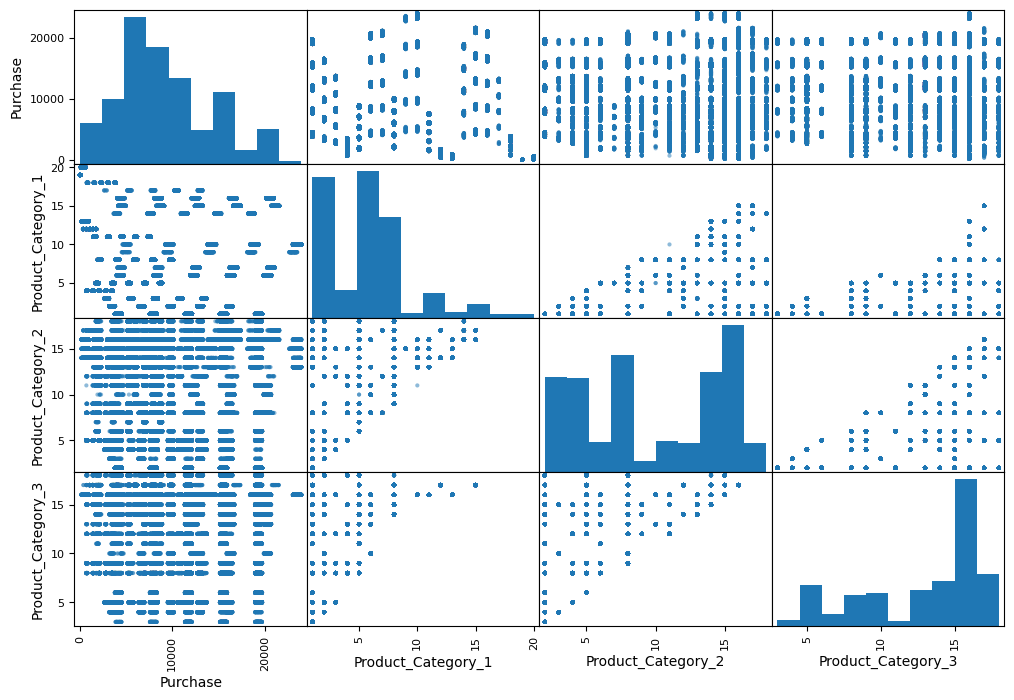

In [46]:
from pandas.plotting import scatter_matrix

attributes = ["Purchase", "Product_Category_1",
              "Product_Category_2","Product_Category_3"]
scatter_matrix(BlackFridaySale[attributes], figsize=(12, 8))




# Cleaning


In [47]:
sample_incomplete_rows = BlackFridaySale[BlackFridaySale.isnull().any(axis=1)].head()
sample_incomplete_rows   # display rows with missing values


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227


In [48]:
sample_incomplete_rows.drop("Product_Category_3", axis=1)       


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,15227


In [49]:
sample_incomplete_rows.dropna(subset=["Product_Category_2"])  
 


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227


*I decided to drop the entire row of product_category_3 as when I looked at the correlations, it had the lowest amount. As we had product_category_1 and product_category_2, I thought that that would be enough to still make valuable conclusions on the data. I decided to drop the columns with NAN in product_category_2 as it had the least amount of NANs and, I did not want to drop another row completely.* 